### Importar las librerías a utilizar

In [220]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Leer archivo de datos

In [221]:
datos = pd.read_csv("titanic3.csv")

In [222]:
datos.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [223]:
datos.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [224]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [194]:
datos.shape

(1309, 14)

## Ejemplos de uso de Seaborn para explorar los datos

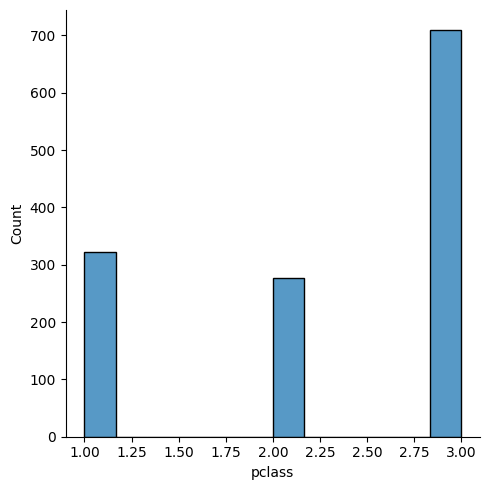

In [195]:
sns.displot(datos['pclass'])

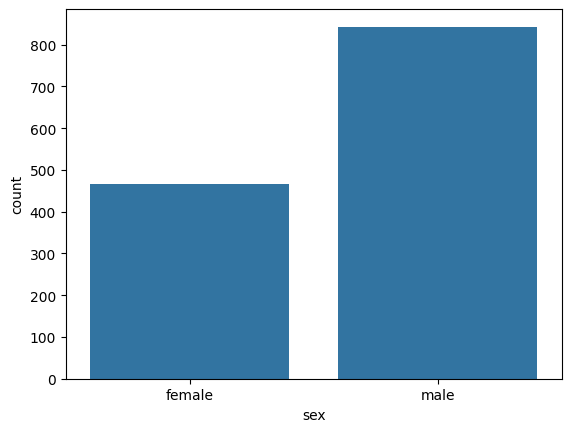

In [196]:
sns.countplot(x = 'sex', data = datos);

### Pura Magia

In [197]:
profile = ProfileReport(datos)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Toda la información que nos da este reporte, la podemos obtener directamente con instrucciones de Pandas...obviamente, es mucho más simple dar una sola instrucción.

### Conocemos los datos y ahora qué hacer para prepararlos (limpiarlos)?

Pandas tiene todas las instrucciones para:
1.  estandarizar los nombres de las variables
2.  eliminar datos faltantes
3.  eliminar registros duplicados
4.  crear nuevas variables
5.  etc.


###  Eliminar columnas

La columna "body" normalmente no nos será útil, eliminémosla

In [225]:
datos = datos.drop(labels="body", axis=1)

#### **Respuesta a Inciso**

Utilizando la función drop se elimina la columna `body`.

### Cambiar el tipo de algunos datos

Varias de las columnas son categóricas, habrá que codificarlas

In [226]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [227]:
dataTransf = pd.DataFrame()  # DataFrame final
nominalTransfCol = OneHotEncoder(sparse_output=False)  
vNominal = ["sex","ticket","cabin","embarked","boat","home.dest"]
# vNominal = ["sex"]
categorias = {}  # Diccionario para almacenar las categorías en orden

# Transformar variables categóricas y añadirlas al DataFrame
for var in vNominal:
    # Obtener el df y sus valores
    dc_parser = datos[var].values.reshape(-1, 1)

    # Transformar los datos
    dc_parser_transformed = nominalTransfCol.fit_transform(dc_parser)
    
    # Obtener los nombres de las categorías y almacenarlas en el diccionario
    categorias[var] = nominalTransfCol.categories_[0].tolist()

    # Obtener los nombres de columnas generadas
    dc_temp_column_name = [var + "_" + str(j) for j in range(dc_parser_transformed.shape[1])]

    # Convertir a DataFrame y concatenar
    dc_temp = pd.DataFrame(dc_parser_transformed, columns=dc_temp_column_name)
    dataTransf = pd.concat([dataTransf, dc_temp], axis=1)

#### **Respuesta a Inciso: `Cambiar el Tipo de Algunos Datos`**

**Explicación código:**
  1. Al obtener el df y sus valores se transforma la columna con sus observaciones a un objeto `array de numpy` en `2 dimensiones` porque OneHotEncoder trabaja con este tipo de objetos.
    1.1 `reshape(-1,1)`: el -1 indica que haga la cantidad de observaciones necesarias y 1 indica que deben estar en una columna.
  2. Se transforman los datos usando fit_transform
  3. Se obtienen las diferentes categorías de la columna que se transformó mediante `categories_[0]` porque una vez hecho fit esas distintas categorías se almacenan en un array y dado que se hace por columna solo hay una columna en `categories_` y se guarda en el diccionario de categorias.
  4. Se hace un listado con el nombre de columnas con la sintaxis **columna_iteracion**.
  5. Se hace un df con los datos transformados y colocandole nombre a las columnas con el listado anterior y concatenandolo al df final.

En este punto se tiene los dataframes:

- data: este es el dataframe original (quitando la columna body que no será utilizada).
- dataTransf: este es el dataframe con las variables nominales transformadas a numéricas.
  - En el caso de variables nominales se realiza una conversión siguiendo OneHotEncoding de SkLearn para variables nominales como sex, ticket, cabin, embarked, boat, home.dest.

### Estandarizar los nombres de las columnas:

In [228]:
numCol = 0
new_columns = dataTransf.columns.to_list() # Obtener el listado de nombre de columnas en un listado

# Obtener nuevos nombres de columnas
for col in vNominal:
    cat = categorias[col]
    for nCat in range(len(cat)):
        if pd.isna(cat[nCat]):
            continue  # Si la categoría es NaN, omitirla
        new_columns[numCol] = f"{col}_{cat[nCat]}"
        numCol += 1

dataTransf.columns = new_columns # Estandarizar el nombre de las columnas

#### **Respuesta a Inciso: `Estandarizar los nombres de las columnas`**

Dado que por parte de OneHotEncoder tenemos las diferentes categorías y el algoritmo divide en varias columnas para colocar un 1 si pertenece a dicha categoría y 0 si no.

> Nota: esto lo hace en orden alfabetico si no se dice lo contrario.

Por lo tanto se puede colocar el nombre asociado a la categoría a cada columna por ejemplo **sex_female y sex_male** sabiendo que el orden de las categorias de las columnas obtenido por OneHotEncoder estan en el mismo orden que las columnas los datos mantendran orden.

In [229]:
dataTransf

sex_female  sex_male  ticket_110152  ticket_110413  ticket_110465  \
0            1.0       0.0            0.0            0.0            0.0   
1            0.0       1.0            0.0            0.0            0.0   
2            1.0       0.0            0.0            0.0            0.0   
3            0.0       1.0            0.0            0.0            0.0   
4            1.0       0.0            0.0            0.0            0.0   
...          ...       ...            ...            ...            ...   
1304         1.0       0.0            0.0            0.0            0.0   
1305         1.0       0.0            0.0            0.0            0.0   
1306         0.0       1.0            0.0            0.0            0.0   
1307         0.0       1.0            0.0            0.0            0.0   
1308         0.0       1.0            0.0            0.0            0.0   

      ticket_110469  ticket_110489  ticket_110564  ticket_110813  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
1304            0.0            0.0            0.0            0.0   
1305            0.0            0.0            0.0            0.0   
1306            0.0            0.0            0.0            0.0   
1307            0.0            0.0            0.0            0.0   
1308            0.0            0.0            0.0            0.0   

      ticket_111163  ...  home.dest_Woodford County, KY  \
0               0.0  ...                            0.0   
1               0.0  ...                            0.0   
2               0.0  ...                            0.0   
3               0.0  ...                            0.0   
4               0.0  ...                            0.0   
...             ...  ...                            ...   
1304            0.0  ...                            0.0   
1305            0.0  ...                            0.0   
1306            0.0  ...                            0.0   
1307            0.0  ...                            0.0   
1308            0.0  ...                            0.0   

      home.dest_Worcester, England  home.dest_Worcester, MA  \
0                              0.0                      0.0   
1                              0.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      0.0   
4                              0.0                      0.0   
...                            ...                      ...   
1304                           0.0                      0.0   
1305                           0.0                      0.0   
1306                           0.0                      0.0   
1307                           0.0                      0.0   
1308                           0.0                      0.0   

      home.dest_Yoevil, England / Cottage Grove, OR  home.dest_Youngstown, OH  \
0                                               0.0                       0.0   
1                                               0.0                       0.0   
2                                               0.0                       0.0   
3                                               0.0                       0.0   
4                                               0.0                       0.0   
...                                             ...                       ...   
1304                                            0.0                       0.0   
1305                                            0.0                       0.0   
1306                                            0.0                       0.0   
1307        

### Eliminar filas duplicadas

In [230]:
datos_num = datos[["pclass", "survived", "name", "age", "sibsp", "parch", "fare"]]
titanic = pd.concat([datos_num, dataTransf], axis=1)

duplicados = titanic.duplicated().sum()

if duplicados > 0:
  duplicados = duplicados.drop_duplicates()
  print(f"Se eliminaron {duplicados} observaciones.")
else:
  print("No hay observaciones duplicadas.")

No hay observaciones duplicadas.


#### **Respuesta Inciso: `Eliminar filas duplicadas`**

Uniendo los DataFrame en uno solo contando los `numéricos` de datos y los "`categoricos`" de dataTransf se cuenta las observaciones duplicadas, en caso que hubieran *(no es el caso)* se eliminan.


### Reemplazar valores faltantes

### Eliminar filas con valores faltantes

In [239]:
res_nan = titanic.isnull().sum()

if res_nan.sum() > 0:
    print(f"Existen {res_nan.sum()} observaciones NaN")
    titanic.dropna(inplace=True)
else:
    print("No existen valores NaN")


No existen valores NaN


In [240]:
titanic.isnull().sum()

pclass                           0
survived                         0
name                             0
age                              0
sibsp                            0
                                ..
home.dest_Zurich, Switzerland    0
home.dest_366                    0
home.dest_367                    0
home.dest_368                    0
home.dest_369                    0
Length: 1527, dtype: int64

#### **Respuesta Inciso: `Eliminar  con valores faltantes`**

Si existen valores nan se eliminan detectacdolos con `isnull().sum().sum()` en tal caso caso se eliminarán las observaciones asociadas a los valores nan.

### Explorar los datos numéricos

Realizar Boxplots para cada uno

In [233]:
ageDF = titanic["age"]
fareDF = titanic["fare"]
sibspDF = titanic["sibsp"]
parchDF = titanic["parch"]

#### **BoxPlot: Age**

Los datos reflejan que existe una variabilidad de los años de los pasajeros entre 20 y 40 años con una media entre 28 - 30 años indicando que el 50% de las personas tenían una edad menor a esa indicando que los datos se inclinan levemente (y podría considerarse casi una distribución simétrica) a tener más personas jóvenes. con una distribución asimétrica debido a esto. Si embargo, existen datos atípicos después de ~68 años.

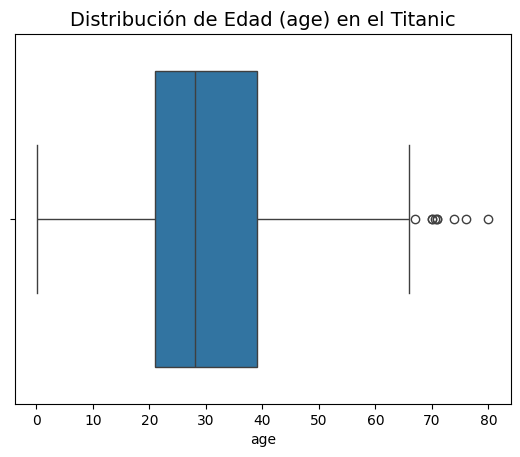

In [234]:
sns.boxplot(data=ageDF, orient="h")
plt.title("Distribución de Edad (age) en el Titanic", fontsize=14)
plt.show()

##### **BoxPlot: Fare**

Los datos reflejan que existe una concentración de las tarifas de los tickets entre 0 y 50 libras, con un máximo cercano a 100 libras y datos atípicos en el rango de 100 a 300 libras, además de uno de 500 libras. Esto puede indicar una distribución de personas según la clase social: los datos atípicos probablemente representan a los pasajeros de primera clase, mientras que los valores concentrados corresponden a quienes viajaban en segunda y tercera clase. Sin embargo, se observa que la mediana está aproximadamente en 10 libras, lo que significa que el 50% de los valores de tarifa son menores o iguales a este valor, y a partir de ahí el precio aumenta considerablemente.

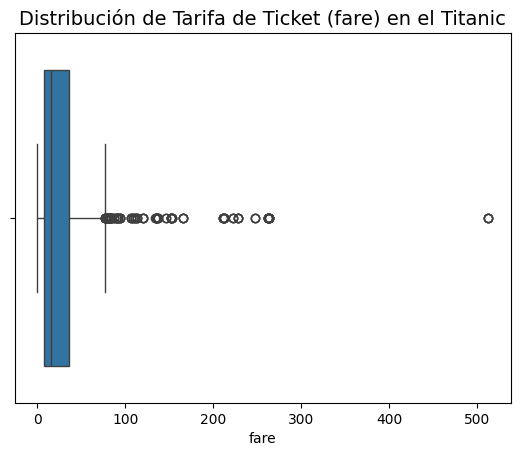

In [208]:
sns.boxplot(data=fareDF, orient="h")
plt.title("Distribución de Tarifa de Ticket (fare) en el Titanic", fontsize=14)
plt.show()

##### **BoxPlot: Sibs**

Los datos reflejan que la mayoría de las personas a bordo no iban acompañadas de este tipo de familiares, lo cual puede considerarse normal, especialmente en el caso de "esposo/a". En cuanto a hermanos, parece común que solo viajara una persona o, en algunos casos, ninguna, con un máximo de dos. Sin embargo, se identifican casos atípicos donde el número de estos familiares varía entre tres y ocho.

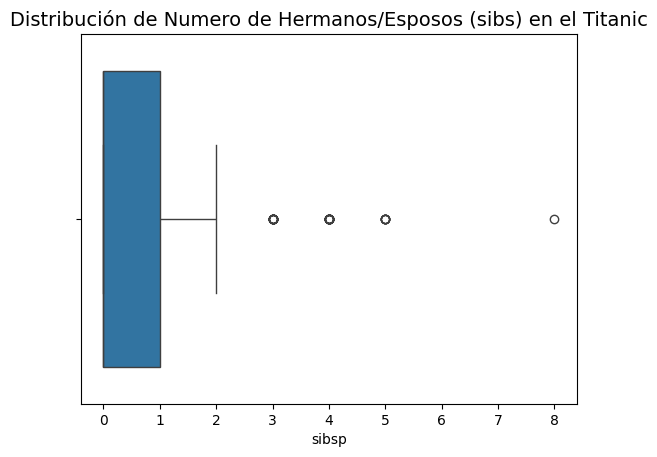

In [209]:
sns.boxplot(data=sibspDF, orient="h")
plt.title("Distribución de Numero de Hermanos/Esposos (sibs) en el Titanic", fontsize=14)
plt.show()

##### **BoxPlot: Parch**

Al igual que sibs se puede observar el mismo comportamiento con esta variable indicando los casos especiales de 0 padres en caso de niños que iban con niñeras por ejemplo y un máximo de 2 para cualquiera de los familiares padres/hijos con datos atípicos desde 3 a 8 familiares.

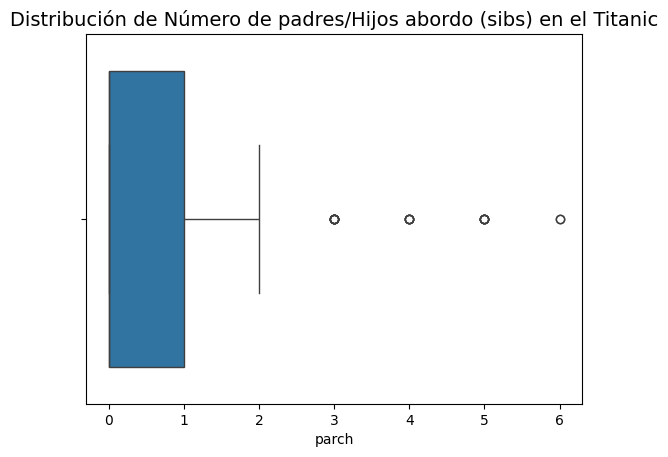

In [238]:
sns.boxplot(data=parchDF, orient="h")
plt.title("Distribución de Número de padres/Hijos abordo (sibs) en el Titanic", fontsize=14)
plt.show()

### Explorar los datos categóricos

Realizar gráficas de barras ej. de survived, sex

#### **BarPlot: Sex**

En los resultados vemos que de la cantidad total de pasajeros más del 50% era hombres y el retos mujeres.

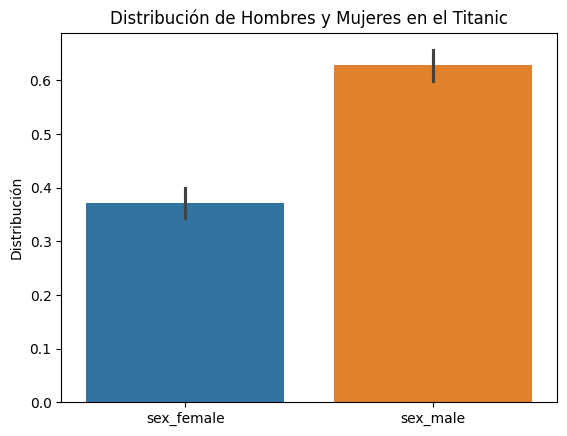

In [211]:
sex_columns = titanic.filter(like="sex_", axis=1)
sns.barplot(sex_columns)
plt.title("Distribución de Hombres y Mujeres en el Titanic")
plt.ylabel("Distribución")
plt.show()

##### **BarPlot: Survived**

En los resultados vemos que de la cantidad total de pasajeros la mayoría no pudo sobrevivir.

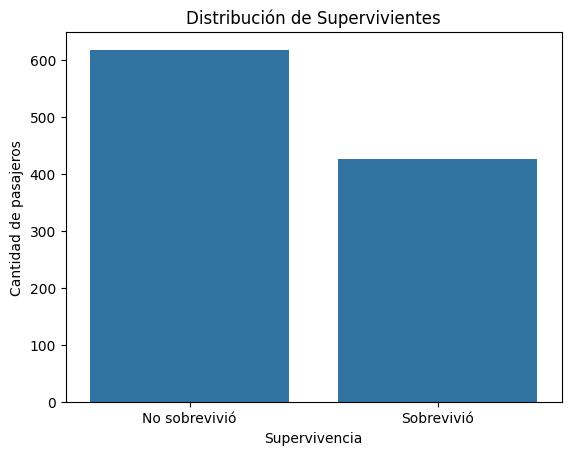

In [212]:
sns.countplot(data=titanic, x="survived")
plt.xlabel("Supervivencia")
plt.ylabel("Cantidad de pasajeros")
plt.title("Distribución de Supervivientes")
plt.xticks([0, 1], ['No sobrevivió', 'Sobrevivió'])
plt.show()

#### **BarPlot: Embarked**

En los resultados se puede observar una distribución clara de los puertos desde los cuales embarcó el Titanic, lo que refleja, en cierta medida, el estatus socioeconómico de los pasajeros. Por ejemplo, según el siguiente [artículo](https://acortar.link/SD2rjR), el puerto de **Southampton** era conocido por recibir a personas elegantemente vestidas, lo que indicaba que la mayoría de los pasajeros eran de clases más altas en el momento de embarcar. Por otro lado, **Cherbourg** fue el puerto más grande del mundo en su época, según este [artículo ](https://acortar.link/Mq1t8i), lo que sugiere que un número significativo de pasajeros abordaron el Titanic desde allí.

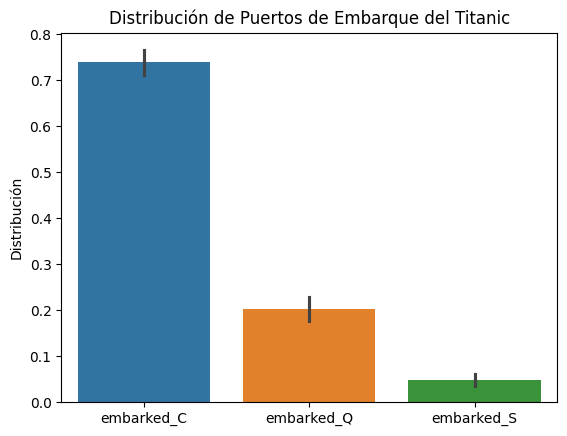

In [213]:
embarked_columns = titanic.filter(like="embarked_", axis=1)
sns.barplot(embarked_columns)
plt.title("Distribución de Puertos de Embarque del Titanic")
plt.ylabel("Distribución")
plt.show()

Contrastar variables categóricas, por ej. survived vs sex con gráfica de barras apiladas (stacked)

##### **BarPlot: Sex vs Survived**

En los datos se observa que la supervivencia se priorizó para las mujeres gran diferencia teniendo relación con los [artículos](https://acortar.link/UQKdGQ) que afirman esta prioridad con el género.

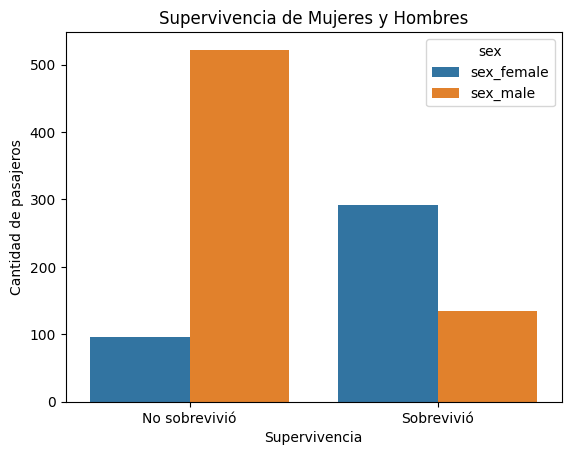

In [214]:
spTitanic = pd.concat([titanic["survived"], sex_columns], axis=1)

# Obtener una única columna para 'sex'
spTitanic_melted = spTitanic.melt(id_vars=["survived"], value_vars=sex_columns.columns, var_name="sex", value_name="value")

# Filtrar solo las filas donde el valor es 1
spTitanic_melted = spTitanic_melted[spTitanic_melted["value"] == 1]

sns.countplot(data=spTitanic_melted, x="survived", hue="sex")
plt.xlabel("Supervivencia")
plt.xticks([0, 1], ['No sobrevivió', 'Sobrevivió'])
plt.ylabel("Cantidad de pasajeros")
plt.title("Supervivencia de Mujeres y Hombres")
plt.show()

##### **BarPlot: Sex vs Pclass**

En los resultados podemos observar que la presencia de hombres siempre es mayor a la de mujeres en todas las clases.

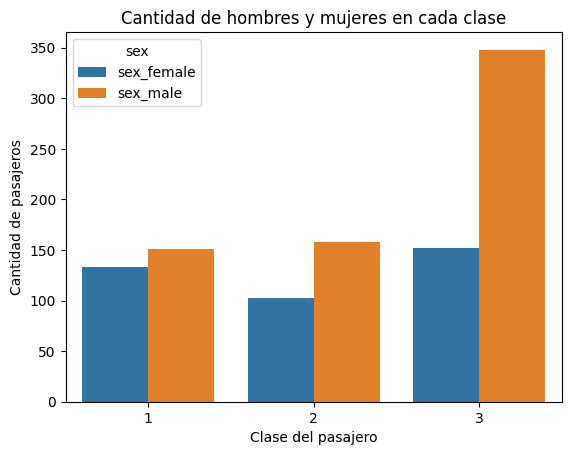

In [215]:
spTitanic = pd.concat([titanic["pclass"], sex_columns], axis=1)

# Obtener una única columna para 'sex'
spTitanic_melted = spTitanic.melt(id_vars=["pclass"], value_vars=sex_columns.columns, var_name="sex", value_name="value")

# Filtrar solo las filas donde el valor es 1
spTitanic_melted = spTitanic_melted[spTitanic_melted["value"] == 1]

sns.countplot(data=spTitanic_melted, x="pclass", hue="sex")
plt.xlabel("Clase del pasajero")
plt.ylabel("Cantidad de pasajeros")
plt.title("Cantidad de hombres y mujeres en cada clase")
plt.show()

### Reducir la cardinalidad

Pueden haber columas con datos categóricos demasiados variados, se podría poner un límite de frecuencia de una categoría y las que no cumplen cambiarles a un valor ötros", o algo así

In [241]:
# Determinar si el df solo tiene una categoría
def isOnlyOne(nCat):
  df_temp = pd.DataFrame(categorias[nCat], columns=[nCat])
  count = df_temp[nCat].value_counts()
  
  if count.max() == 1:
    return True
  else:
    False  

# Obtener frecuencias
def giveMeFrencuencys(df):
  cantTotal = df.sum().sum()
  listCant = df.sum()
  frecuencias = listCant / cantTotal
  df_frecuencias = pd.DataFrame({'Categoría': listCant.index, 'Frecuencia': frecuencias})

  return df_frecuencias

# Obtener el umbral para agrupar categorias
def giveMeUmbral(df_frecuency):
  
  # Obtener el máximo y mínimo para obtener el umbral
  max_val = df_frecuency["Frecuencia"].max()
  min_val = df_frecuency["Frecuencia"].min()
  
  umbral = (max_val + min_val) / 2
  
  return umbral

# Obtener el df filtrado
def filterCategories(df, name_column):
  # Obtener df_frecuency y umbral
  df_frecuency = giveMeFrencuencys(df=df)
  umbral = giveMeUmbral(df_frecuency=df_frecuency)
  
  # Filtrar columnas que superan el umbral
  columnas_superan_umbral = df_frecuency[df_frecuency["Frecuencia"] > umbral]["Categoría"]

  # Seleccionar las columnas correspondientes en el DataFrame original
  df_filtrado = df[columnas_superan_umbral]

  # Agrupar las columnas restantes en '_other'
  columnas_bajas = df_frecuency[df_frecuency["Frecuencia"] <= umbral]["Categoría"]
  df_other = df[columnas_bajas].sum(axis=1)

  # Agregar la columna '_other' al DataFrame filtrado
  df_filtrado = df[columnas_superan_umbral].copy() # aplicar directamente a un df y no una vista
  df_filtrado.loc[:, name_column + "_other"] = df_other
  
  return df_filtrado

variationCat=["ticket","cabin", "boat", "home.dest"]
titanic2 = titanic.copy()

# df a reducir las categorías
df_ticket = titanic.filter(like=variationCat[0]+"_", axis=1)
df_cabin = titanic.filter(like=variationCat[1]+"_", axis=1)
df_boat = titanic.filter(like=variationCat[2]+"_", axis=1)
df_home_dest = titanic.filter(like=variationCat[3]+"_", axis=1)

listadoFiltrar = [df_ticket, df_cabin, df_boat, df_home_dest]

for i in range(len(listadoFiltrar)):
  df_a_filtrar = listadoFiltrar[i]
  
  # Quitar un df de otro por sus columnas
  df_filtrado = filterCategories(df_a_filtrar, variationCat[i])
  titanic2 = titanic2.drop(columns=df_a_filtrar.columns)
  titanic2 = pd.concat([titanic2, df_filtrado], axis=1)


In [217]:
titanic2

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1301       3         0                             Youseff, Mr. Gerious   
1304       3         0                             Zabour, Miss. Hileni   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

          age  sibsp  parch      fare  sex_female  sex_male  embarked_C  ...  \
0     29.0000      0      0  211.3375         1.0       0.0         0.0  ...   
1      0.9167      1      2  151.5500         0.0       1.0         0.0  ...   
2      2.0000      1      2  151.5500         1.0       0.0         0.0  ...   
3     30.0000      1      2  151.5500         0.0       1.0         0.0  ...   
4     25.0000      1      2  151.5500         1.0       0.0         0.0  ...   
...       ...    ...    ...       ...         ...       ...         ...  ...   
1301  45.5000      0      0    7.2250         0.0       1.0         1.0  ...   
1304  14.5000      1      0   14.4542         1.0       0.0         1.0  ...   
1306  26.5000      0      0    7.2250         0.0       1.0         1.0  ...   
1307  27.0000      0      0    7.2250         0.0       1.0         1.0  ...   
1308  29.0000      0      0    7.8750         0.0       1.0         1.0  ...   

      cabin_F2  cabin_F33  cabin_F4  cabin_G6  cabin_other  boat_1  \
0          0.0        0.0       0.0       0.0          1.0     1.0   
1          0.0        0.0       0.0       0.0          0.0     1.0   
2          0.0        0.0       0.0       0.0          0.0     1.0   
3          0.0        0.0       0.0       0.0          0.0     1.0   
4          0.0        0.0       0.0       0.0          0.0     1.0   
...        ...        ...       ...       ...          ...     ...   
1301       0.0        0.0       0.0       0.0          0.0     0.0   
1304       0.0        0.0       0.0       0.0          0.0     0.0   
1306       0.0        0.0       0.0       0.0          0.0     0.0   
1307       0.0        0.0       0.0       0.0          0.0     0.0   
1308       0.0        0.0       0.0       0.0          0.0     1.0   

      boat_other  home.dest_Albany, NY  home.dest_369  home.dest_other  
0            1.0                   0.0            0.0              1.0  
1            1.0                   0.0            0.0              1.0  
2            0.0                   1.0            0.0              1.0  
3            0.0                   1.0            0.0              1.0  
4            0.0                   1.0            0.0              1.0  
...          ...                   ...            ...              ...  
1301         0.0                   1.0            1.0              0.0  
1304         0.0                   1.0            1.0              0.0  
1306         0.0                   1.0            1.0              0.0  
1307         0.0                   1.0            1.0              0.0  
1308         0.0                   1.0            1.0              0.0  

[1045 rows x 43 columns]

#### **Respuesta Inciso: `Reducir la Cardinalidad`**

El proceso consistió en identificar y reducir la cardinalidad de las variables categóricas (nominales) en el conjunto de datos. En este caso, se analizaron las variables que habían sido transformadas en múltiples subcategorías (columnas) debido a su naturaleza nominal (contando las que obtuvieron una cantidad considerable de columnas al separarse como *"ticket","cabin", "boat" y "home.dest"*).

La estrategia seguida para reducir la cardinalidad fue calcular un **umbral de frecuencia**. Este umbral se determinó como el promedio entre la frecuencia máxima y mínima de las subcategorías de cada variable, es decir:

$
\text{Umbral} = \frac{\text{frec\_max} + \text{frec\_min}}{2}
$

A partir de este umbral, se clasificaron las subcategorías en dos grupos:
- Las subcategorías cuya frecuencia superaba el umbral se mantuvieron como columnas separadas.
- Las subcategorías con una frecuencia menor al umbral se agruparon en una nueva columna denominada `<variable_name>_other`, con el fin de reducir la cantidad de columnas.

Gracias a este enfoque, se logró reducir el número de columnas del conjunto de datos de **1527** a **43**, lo que permitió simplificar el análisis y disminuir la variabilidad en los datos sin perder información crucial.

Esta técnica es útil para manejar variables con muchas categorías poco frecuentes, optimizando el procesamiento y análisis posterior de los datos.

### Eliminar datos atípicos

In [256]:
from scipy import stats

numericCol = ["sibsp", "parch", "fare"]
threshold = 3  # Umbral para considerar outliers

# Calcular Z-score para cada columna numérica y filtrar valores atípicos
z_scores = np.abs(stats.zscore(titanic2[numericCol]))

# Filtrar las filas que NO contienen outliers en ninguna columna
titanic_clean = titanic2[(z_scores < threshold).all(axis=1)]

# Mostrar el número de filas eliminadas
print(f"Filas originales: {titanic2.shape[0]}")
print(f"Filas después de eliminar outliers: {titanic_clean.shape[0]}")

Filas originales: 1045
Filas después de eliminar outliers: 963


In [258]:
titanic_clean

pclass  survived                                             name  \
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                              Anderson, Mr. Harry   
...      ...       ...                                              ...   
1301       3         0                             Youseff, Mr. Gerious   
1304       3         0                             Zabour, Miss. Hileni   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

          age  sibsp  parch      fare  sex_female  sex_male  embarked_C  ...  \
1      0.9167      1      2  151.5500         0.0       1.0         0.0  ...   
2      2.0000      1      2  151.5500         1.0       0.0         0.0  ...   
3     30.0000      1      2  151.5500         0.0       1.0         0.0  ...   
4     25.0000      1      2  151.5500         1.0       0.0         0.0  ...   
5     48.0000      0      0   26.5500         0.0       1.0         0.0  ...   
...       ...    ...    ...       ...         ...       ...         ...  ...   
1301  45.5000      0      0    7.2250         0.0       1.0         1.0  ...   
1304  14.5000      1      0   14.4542         1.0       0.0         1.0  ...   
1306  26.5000      0      0    7.2250         0.0       1.0         1.0  ...   
1307  27.0000      0      0    7.2250         0.0       1.0         1.0  ...   
1308  29.0000      0      0    7.8750         0.0       1.0         1.0  ...   

      cabin_F2  cabin_F33  cabin_F4  cabin_G6  cabin_other  boat_1  \
1          0.0        0.0       0.0       0.0          0.0     1.0   
2          0.0        0.0       0.0       0.0          0.0     1.0   
3          0.0        0.0       0.0       0.0          0.0     1.0   
4          0.0        0.0       0.0       0.0          0.0     1.0   
5          0.0        0.0       0.0       0.0          1.0     1.0   
...        ...        ...       ...       ...          ...     ...   
1301       0.0        0.0       0.0       0.0          0.0     0.0   
1304       0.0        0.0       0.0       0.0          0.0     0.0   
1306       0.0        0.0       0.0       0.0          0.0     0.0   
1307       0.0        0.0       0.0       0.0          0.0     0.0   
1308       0.0        0.0       0.0       0.0          0.0     1.0   

      boat_other  home.dest_Albany, NY  home.dest_369  home.dest_other  
1            1.0                   0.0            0.0              1.0  
2            0.0                   1.0            0.0              1.0  
3            0.0                   1.0            0.0              1.0  
4            0.0                   1.0            0.0              1.0  
5            1.0                   0.0            0.0              1.0  
...          ...                   ...            ...              ...  
1301         0.0                   1.0            1.0              0.0  
1304         0.0                   1.0            1.0              0.0  
1306         0.0                   1.0            1.0              0.0  
1307         0.0                   1.0            1.0              0.0  
1308         0.0                   1.0            1.0              0.0  

[963 rows x 43 columns]

In [254]:
titanic_clean.describe()

pclass    survived         age       sibsp       parch        fare  \
count  960.00000  960.000000  960.000000  960.000000  960.000000  960.000000   
mean     2.21875    0.407292   29.908507    0.371875    0.292708   28.102022   
std      0.82711    0.491586   13.823092    0.612896    0.594333   31.280629   
min      1.00000    0.000000    0.166700    0.000000    0.000000    0.000000   
25%      1.00000    0.000000   21.000000    0.000000    0.000000    8.050000   
50%      2.00000    0.000000   28.000000    0.000000    0.000000   13.950000   
75%      3.00000    1.000000   38.000000    1.000000    0.000000   30.000000   
max      3.00000    1.000000   71.000000    3.000000    2.000000  164.866700   

       sex_female   sex_male  embarked_C  embarked_Q  ...    cabin_F2  \
count   960.00000  960.00000  960.000000  960.000000  ...  960.000000   
mean      0.35625    0.64375    0.753125    0.195833  ...    0.004167   
std       0.47914    0.47914    0.431418    0.397048  ...    0.064449   
min       0.00000    0.00000    0.000000    0.000000  ...    0.000000   
25%       0.00000    0.00000    1.000000    0.000000  ...    0.000000   
50%       0.00000    1.00000    1.000000    0.000000  ...    0.000000   
75%       1.00000    1.00000    1.000000    0.000000  ...    0.000000   
max       1.00000    1.00000    1.000000    1.000000  ...    1.000000   

        cabin_F33    cabin_F4    cabin_G6  cabin_other      boat_1  \
count  960.000000  960.000000  960.000000   960.000000  960.000000   
mean     0.004167    0.003125    0.005208     0.217708    0.756250   
std      0.064449    0.055843    0.072018     0.412903    0.429567   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.000000    0.000000    0.000000     0.000000    1.000000   
50%      0.000000    0.000000    0.000000     0.000000    1.000000   
75%      0.000000    0.000000    0.000000     0.000000    1.000000   
max      1.000000    1.000000    1.000000     1.000000    1.000000   

       boat_other  home.dest_Albany, NY  home.dest_369  home.dest_other  
count  960.000000            960.000000     960.000000       960.000000  
mean     0.384375              0.603125       0.348958         0.665625  
std      0.490967              0.489505       0.476889         0.499912  
min      0.000000              0.000000       0.000000         0.000000  
25%      0.000000              0.000000       0.000000         0.000000  
50%      0.000000              1.000000       0.000000         1.000000  
75%      1.000000              1.000000       1.000000         1.000000  
max      2.000000              1.000000       1.000000         2.000000  

[8 rows x 42 columns]

In [255]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Columns: 1527 entries, pclass to home.dest_369
dtypes: float64(1522), int64(4), object(1)
memory usage: 12.2+ MB


#### **Respuesta Inciso: `Reducir la Cardinalidad`**

El proceso consistió en usar el método `z-score` mencionado en la [página](https://acortar.link/0eiT4u). Este método mide cuántas desviaciones estándar está un valor por encima o por debajo de la media.

Si un dato tiene un Z-score mayor a un umbral (generalmente 3), se considera atípico.
- stats.zscore(column) calcula los Z-scores de una columna.
- np.abs(z) > threshold devuelve True donde hay outliers.
- Luego, se filtran los valores en el dataframe original.

##### **Variables atípicas eliminadas**
1. **"sibsp" (Número de hermanos/esposos a bordo):**   
   - La mayoría de los pasajeros viajaban solos o con pocos familiares.  
   - Valores muy altos (por ejemplo, 8 o más) pueden ser casos raros y afectar la distribución.  

2. **"parch" (Número de padres/hijos a bordo):**   
   - Similar a "sibsp", la mayoría de los pasajeros tenían pocos familiares con ellos.  
   - Valores atípicos pueden representar errores en los datos o situaciones muy inusuales.  

3. **"fare" (Tarifa del boleto):**  
   - Las tarifas tienen una gran variabilidad dependiendo de la clase y el tipo de boleto.  
   - Valores extremadamente altos pueden deberse a boletos de lujo que no representan la mayoría de los pasajeros.  

### Pregunta 1

### Pregunta 2

### Pregunta 3

### Pregunta 4

### Pregunta 5

### Pregunta 6